### ЛР5 Голубев Сергей ИУ5-65Б


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [2]:
# Таблица данных
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Размер набора данных
data.shape

(768, 9)

In [4]:
# Типы данных в колонках
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Подготовка к анализу данных

### Проверка на пропущенные значения

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Пропущенных значений нет

### Основные статистические показатели для каждого параметра

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Преообразование категориальных признаков в числовые

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
data. head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 1. Тестовая и обучающая выборки

Подключим необходимый метод train_test_split из библиотек sklearn для разделения выборки на тестовую и обучающую

In [10]:
from sklearn.model_selection import train_test_split

### 1.1. Разделение выборки на входные и выходные данные

Задача регрессии будет состоять в предсказании платы за медицинское обслуживание на основании других параметров, в связи с этим следующее распределение входных и выходных параметров:

In [11]:
X = data.drop(['BMI', 'DiabetesPedigreeFunction', 'Pregnancies', 'SkinThickness', 'Outcome'], axis = 1)
Y = data.Age
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    Glucose  BloodPressure  Insulin  Age
0      148             72        0   50
1       85             66        0   31
2      183             64        0   32
3       89             66       94   21
4      137             40      168   33 

Выходные данные:

 0    50
1    31
2    32
3    21
4    33
Name: Age, dtype: int64


### 1.2. Разделим выборку на обучающую и тестовую

Размер тестовой выборки определим: 10%

In [12]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      Glucose  BloodPressure  Insulin  Age
499      154             74      193   39
720       83             86        0   34
556       97             70        0   30
583      100             76        0   42
150      136             74      204   24 

Входные параметры тестовой выборки:

      Glucose  BloodPressure  Insulin  Age
661      199             76        0   22
122      107             74      100   23
113       76             62        0   25
14       166             72      175   51
529      111             65        0   31 

Выходные параметры обучающей выборки:

 499    39
720    34
556    30
583    42
150    24
Name: Age, dtype: int64 

Выходные параметры тестовой выборки:

 661    22
122    23
113    25
14     51
529    31
Name: Age, dtype: int64


Проверим:

In [13]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(691, 4)
(77, 4)
(691,)
(77,)


## 1. Случайный лес

### 1.1. Построение случайного леса

Построим случайный лес из 5 деревьев

Подключим необходимый класс RandomForestRegressor из библиотек sklearn для построения случайного леса

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [16]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 0.0025974025974026343
Средняя квадратичная ошибка: 0.0005194805194805342
Median absolute error: 0.0
Коэффициент детерминации: 0.999995362214091


**Построим график по полученным значениям**

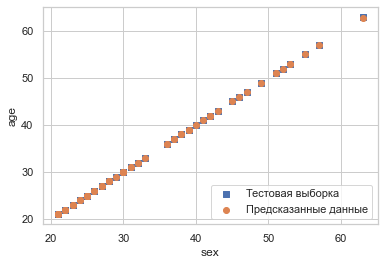

In [17]:
plt.scatter(X_test.Age, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.Age, Y_predict, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('sex')
plt.ylabel ('age')
plt.show()

### 1.2. Нахождение лучшего случайного леса

In [18]:
params2 = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 100],
    'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0]
}

In [19]:
grid_2 = GridSearchCV(estimator=RandomForestRegressor(oob_score=True, random_state=10),
                      param_grid=params2, 
                      scoring='neg_mean_squared_error', 
                      cv=3, 
                      n_jobs=-1)
grid_2.fit(X, Y)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(oob_score=True, random_state=10),
             n_jobs=-1,
             param_grid={'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                          25, 50, 75, 100]},
             scoring='neg_mean_squared_error')

In [20]:
print('Лучший показатель средней квадратичной ошибки:', -grid_2.best_score_)
print('Параметры для данного показателя:\n',            grid_2.best_params_)

Лучший показатель средней квадратичной ошибки: 0.21440338541666656
Параметры для данного показателя:
 {'max_features': 1.0, 'n_estimators': 100}


In [21]:
forest_3 = RandomForestRegressor(n_estimators=75, max_features = 0.8, oob_score=True, random_state=10)
forest_3.fit(X, Y)

RandomForestRegressor(max_features=0.8, n_estimators=75, oob_score=True,
                      random_state=10)

In [22]:
Y_predict3 = forest_3.predict(X_test)

In [23]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict3))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict3))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict3))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict3))

Средняя абсолютная ошибка: 0.052467532467532225
Средняя квадратичная ошибка: 0.009939393939393958
Median absolute error: 0.02666666666666373
Коэффициент детерминации: 0.9999112636962753


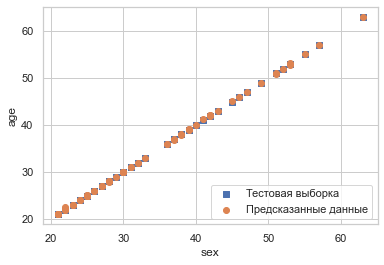

In [24]:
plt.scatter(X_test.Age, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.Age, Y_predict3, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('sex')
plt.ylabel ('age')
plt.show()

    Показатели точности стали сильно лучше
    На графике видно хорошее совпадение тестовой выборки и предсказанных данных, хотя при возрасте от 50 до 60 заметно расхождение в данных.

## 2. Градиентный бустинг

Построим ансамбль из 5 моделей

Подключим необходимый класс GradientBoostingRegressor из библиотек sklearn для построения ансамбля

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
grad = GradientBoostingRegressor(n_estimators=5, random_state = 10)
grad.fit(X_train, Y_train)

GradientBoostingRegressor(n_estimators=5, random_state=10)

In [27]:
Y_grad_pred = grad.predict(X_test)

In [28]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_grad_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_grad_pred))
print('Median absolute error:',       median_absolute_error(Y_test, Y_grad_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_grad_pred))

Средняя абсолютная ошибка: 5.42699121419439
Средняя квадратичная ошибка: 39.915118859601044
Median absolute error: 4.9958279675854556
Коэффициент детерминации: 0.643648281582005


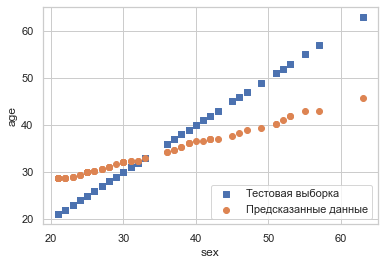

In [29]:
plt.scatter(X_test.Age, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.Age, Y_grad_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('sex')
plt.ylabel ('age')
plt.show()

Без подбора гиперпараметров ансамбль работает очень плохо

Для улучшения применим кросс-валидацию.

In [30]:
params = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 100],
    'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
    'min_samples_leaf': [0.01, 0.04, 0.06, 0.08, 0.1]
}

In [31]:
grid_gr = GridSearchCV(estimator=GradientBoostingRegressor(random_state=10),
                       param_grid=params,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       n_jobs=-1)
grid_gr.fit(X, Y)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=10),
             n_jobs=-1,
             param_grid={'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
                         'min_samples_leaf': [0.01, 0.04, 0.06, 0.08, 0.1],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                          25, 50, 75, 100]},
             scoring='neg_mean_squared_error')

In [32]:
print('Лучший показатель средней квадратичной ошибки:', -grid_gr.best_score_)
print('Параметры для данного показателя:\n',            grid_gr.best_params_)

Лучший показатель средней квадратичной ошибки: 0.3253784764530633
Параметры для данного показателя:
 {'max_features': 1.0, 'min_samples_leaf': 0.01, 'n_estimators': 75}


In [33]:
grad1 = GradientBoostingRegressor(n_estimators=100, max_features = 0.8, min_samples_leaf = 0.01, random_state = 10)
grad1.fit(X_train, Y_train)
Y_grad_pred1 = grad1.predict(X_test)

Оценим полученный ансамбль

In [34]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_grad_pred1))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_grad_pred1))
print('Median absolute error:',       median_absolute_error(Y_test, Y_grad_pred1))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_grad_pred1))

Средняя абсолютная ошибка: 0.2033341760282652
Средняя квадратичная ошибка: 0.06933438744657384
Median absolute error: 0.1808689146464033
Коэффициент детерминации: 0.9993810007631706


Построим график для визуального сравнения

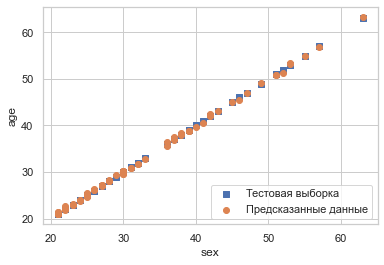

In [35]:
plt.scatter(X_test.Age, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.Age, Y_grad_pred1, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('sex')
plt.ylabel ('age')
plt.show()